In [2]:
#pip install --upgrade matplotlib seaborn pandas numpy
#!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# For visualization (optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
label = LabelEncoder()

In [5]:
sns.set_theme()

In [6]:
# Load the dataset
data = pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Data Information

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
# Checking Target Variable
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
fraud = data[data['isFraud'] == 1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


#### Label Encoding
- Label encoding is a technique used to convert categorical variables (those with discrete values) into numerical values, which can be used by machine learning algorithms. It's particularly useful when you have categorical data that you want to include in your model but that cannot be directly interpreted by algorithms that require numerical input.
- In this case those features can be "nameOrig" , "nameDest" to check for fraud.|

In [11]:
#Label Encoding
data['nameOrig'] = label.fit_transform(data['nameOrig'])
data['nameDest'] = label.fit_transform(data['nameDest'])

In [12]:
data['nameDest'],data['nameOrig'] 

(0          1662094
 1          1733924
 2           439685
 3           391696
 4           828919
             ...   
 6362615     505863
 6362616     260949
 6362617     108224
 6362618     319713
 6362619     534595
 Name: nameDest, Length: 6362620, dtype: int32,
 0           757869
 1          2188998
 2          1002156
 3          5828262
 4          3445981
             ...   
 6362615    5651847
 6362616    1737278
 6362617     533958
 6362618    2252932
 6362619     919229
 Name: nameOrig, Length: 6362620, dtype: int32)

In [13]:
# Number of unique customers (who started the transaction basically sender)
unique_customers = data['nameOrig'].nunique()

# Number of unique recipients (who received the transaction, basically reciever)
unique_recipients = data['nameDest'].nunique()

print(f"Number of unique customers: {unique_customers}")
print(f"Number of unique recipients: {unique_recipients}")

Number of unique customers: 6353307
Number of unique recipients: 2722362


In [14]:
#Checking for NAN values
data.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [15]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.000667,0.003835,0.003776,-0.001122,-0.000513,-0.000529,0.044109,1.000000


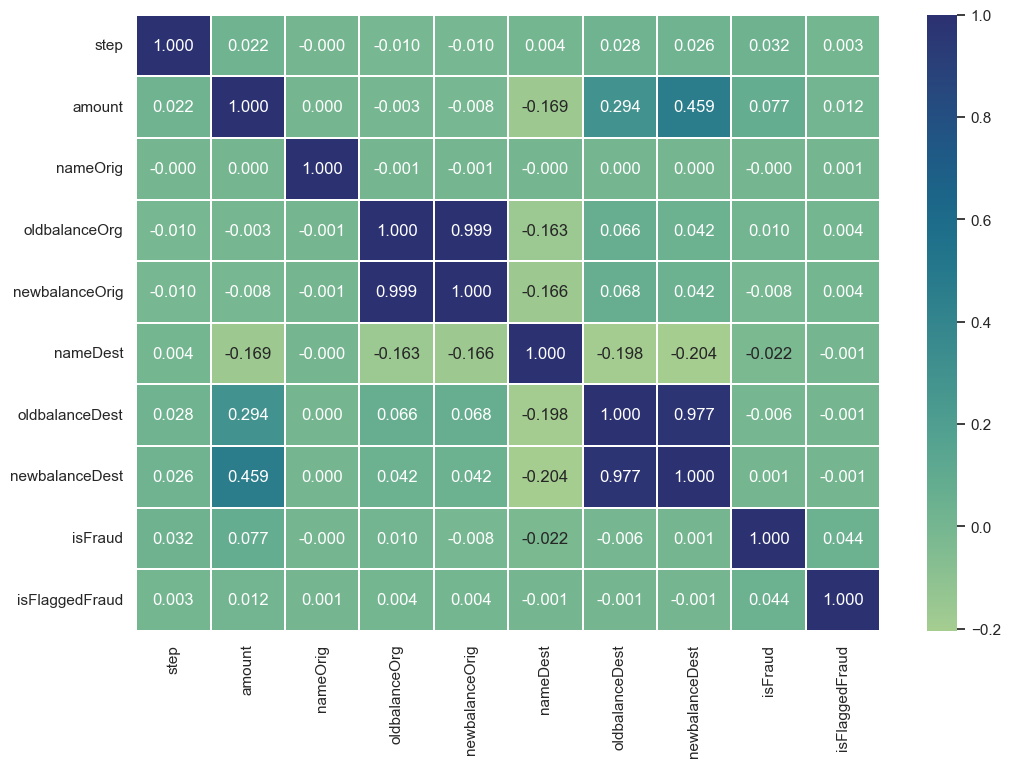

In [16]:
#### Data Visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, linewidth=0.1, cmap="crest", annot=True, fmt=".3f");

<Axes: xlabel='type', ylabel='count'>

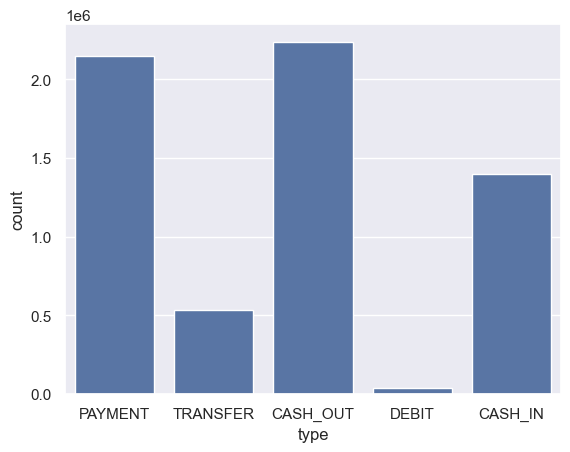

In [17]:
sns.countplot(x=data.type)

In [18]:
print(data['amount'].isna().sum())  # Checking for NaN again in amount column as it was giving me error while i was plotting a graph
print(np.isinf(data['amount']).sum())  # Check for infs again in amount feature as it was giving m eerror whgile i was potting the graph

0
0


In [19]:
# Replace NaN values with a specific value 0 IF-ANYY
data['amount'] = data['amount'].replace([np.inf, -np.inf], np.nan)
data['amount'] = data['amount'].fillna(0)

Text(0.5, 1.0, 'Distribution of Amount')

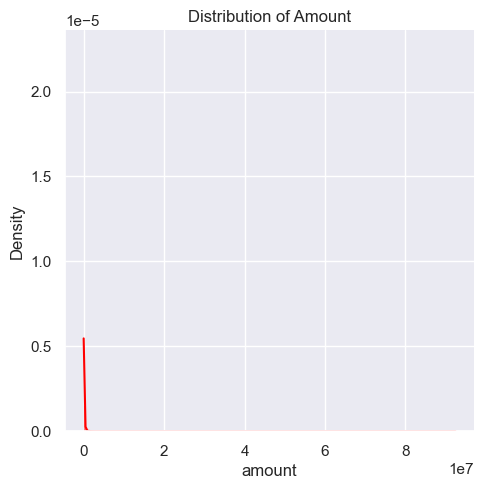

In [20]:
sns.displot(data['amount'], color = 'red', kde = True, stat='density')
plt.title('Distribution of Amount')

<Axes: xlabel='amount', ylabel='Count'>

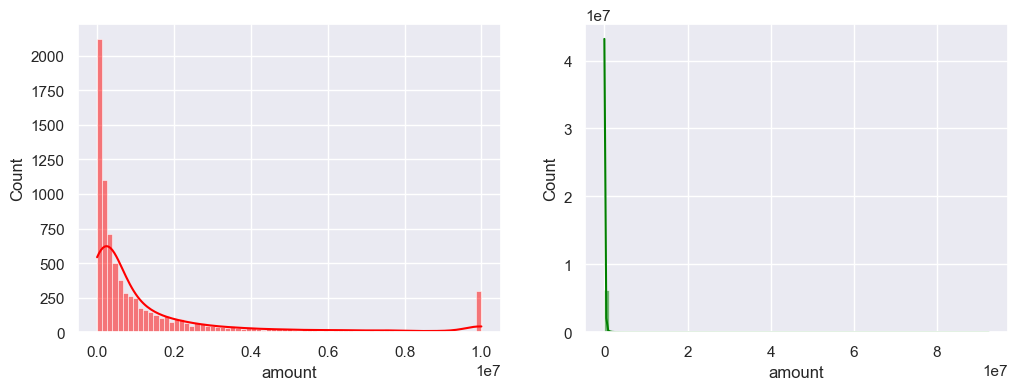

In [21]:
fraud = data[data['isFraud'] == 1]
non_fraud = data[data['isFraud'] == 0]

fig,ax = plt.subplots(1,2,figsize=(12,4))

sns.histplot(fraud['amount'], bins = 75, kde=True, color='red', label='Fraud', stat='count', ax=ax[0])
sns.histplot(non_fraud['amount'], bins = 75, kde=True, color='green', label='Non-Fraud', stat='count', ax=ax[1])

<Axes: xlabel='amount', ylabel='Density'>

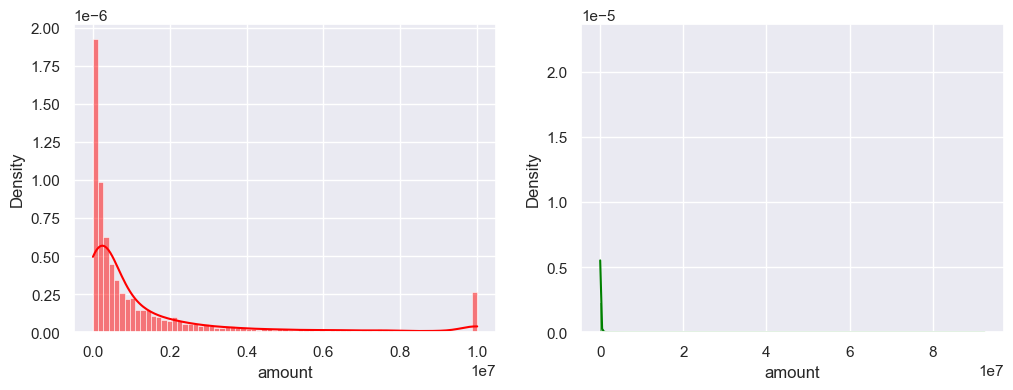

In [22]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
sns.histplot(fraud['amount'], kde=True, color='red', label='Fraud', stat='density', ax=axs[0])
sns.histplot(non_fraud['amount'], kde=True, color='green', label='Non-Fraud', stat='density', ax=axs[1])

#### The above grpah shows that the fraud transactions are mostly occuring when the amount is less

C:\Users\Naman Gupta\AppData\Local\Temp\ipykernel_17792\2638887851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'])


<Axes: xlabel='step', ylabel='Density'>

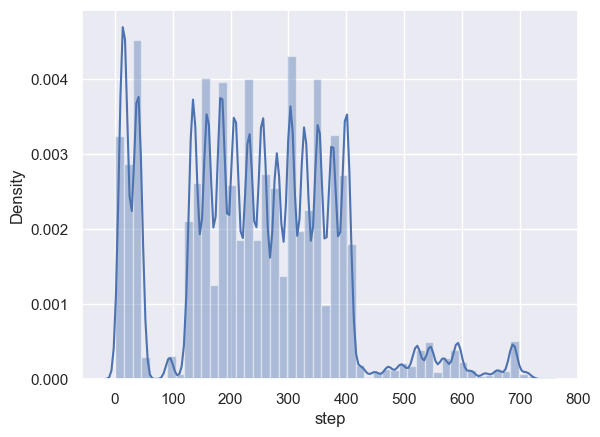

In [23]:
sns.distplot(data['step'])

<Axes: xlabel='step', ylabel='amount'>

C:\Users\Naman Gupta\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Naman Gupta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


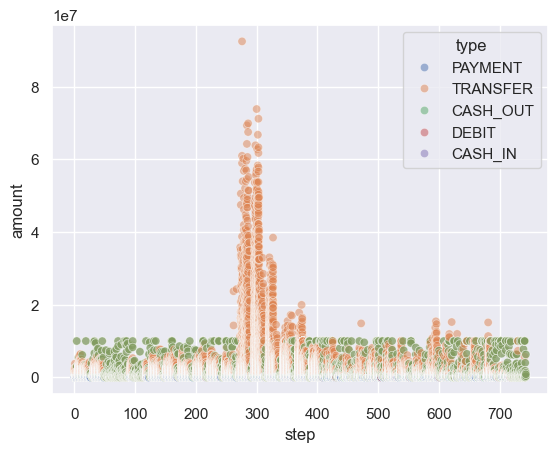

In [24]:
sns.scatterplot(x='step', y='amount', hue='type', data=data, alpha=0.5) 

#### This plot will show you how transaction amounts vary over time, with different colors representing different transaction types and how they are varying

### Model Selection

- At first I will make some changes in hte data and Transaction Type need to be conveted to number as it is an essential feature for our Machine learning Model

In [25]:
print(data['type'].dtype)

object


In [26]:
trans_type = pd.get_dummies(data['type'], prefix='type', drop_first=True)
trans_type.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False


In [27]:
trans_type = trans_type.astype(int)
trans_type.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(2), int64(3), object(1)
memory usage: 485.4+ MB


Now we will drop the type and change it to the dummies which we just created

In [29]:
data = pd.concat([data, trans_type], axis=1)
data = data.drop('type', axis=1)
data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,0,1,0


#### Now we will separate the test and train data set


In [30]:
X_train = data.drop('isFraud' , axis = 1)
y_train = data['isFraud']

X_train , x_test , y_train , y_test = train_test_split(X_train , y_train , test_size = 0.25 , random_state = 42)

In [31]:
X_train.shape , x_test.shape , y_train.shape , y_test.shape

((4771965, 13), (1590655, 13), (4771965,), (1590655,))

## Random Forest

In [32]:
#!pip install imbalanced-learn

In [33]:
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model to the resampled training data
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Make predictions on the test set
y_pred = rf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [36]:
print(conf_matrix)

[[1588582      28]
 [    467    1578]]


In [37]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.98      0.77      0.86      2045

    accuracy                           1.00   1590655
   macro avg       0.99      0.89      0.93   1590655
weighted avg       1.00      1.00      1.00   1590655



In [38]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9996888074409599

#### Plotting the feature importances

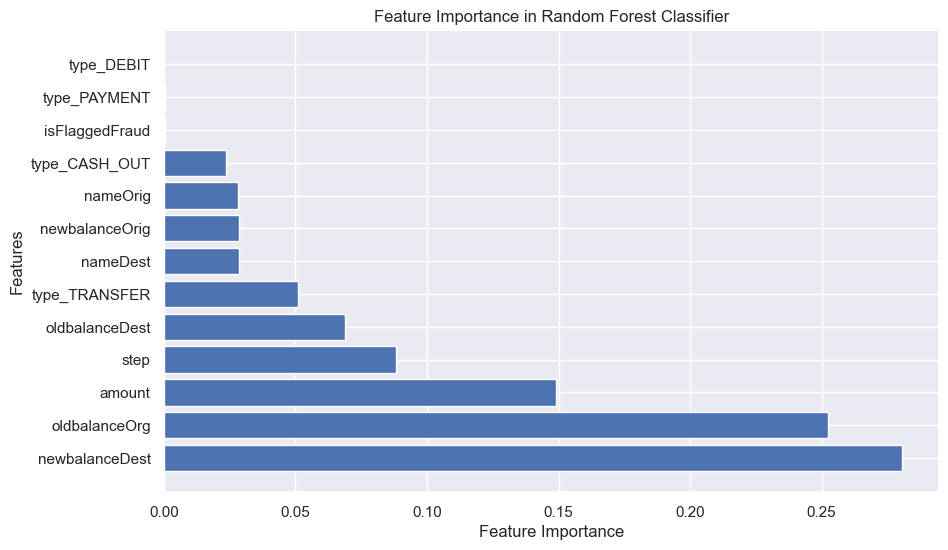

In [39]:
importances = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [40]:
importance_df

,Feature,Importance
7,newbalanceDest,0.280518
3,oldbalanceOrg,0.252220
1,amount,0.148904
0,step,0.088063
6,oldbalanceDest,0.068921
12,type_TRANSFER,0.051108
5,nameDest,0.028741
4,newbalanceOrig,0.028638
2,nameOrig,0.028062
9,type_CASH_OUT,0.023672


The Random Forest model was trained to classify transactions as either fraudulent or non-fraudulent using a large, imbalanced dataset. The model achieved nearly perfect accuracy, excelling at identifying non-fraudulent transactions with high precision and recall. However, its recall for detecting fraudulent transactions was slightly lower, indicating that some frauds may go undetected. Despite this, the model demonstrates strong overall performance, making it a good choice for scenarios with a high volume of non-fraudulent transactions. Adjustments to address the class imbalance could further improve fraud detection.

#### ACCURACY OF RANDOM FOREST CLASSIFIER  = 99.87%

## Decision Tree

In [96]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_pred = clf.predict(x_test)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.89      0.87      0.88      2045

    accuracy                           1.00   1590655
   macro avg       0.94      0.94      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655



#### ACCURACY OF DECISION TREE  = 94%

## Gradient Boosting 

In [98]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42 , learning_rate=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, random_state=42)

In [99]:
gb_predictions = gb.predict(x_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.97      0.81      0.88      2045

    accuracy                           1.00   1590655
   macro avg       0.98      0.90      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655



#### ACCURACY OF GRADIENT BOOSTING CLASSIFIER  = 99.87%

### Before moving further we need to use cross validation of our dataset for better splitting of our dataset more generalised manner and more reliable performance metric there are many techniques like K-Fold Cross-Validation , Stratified K-Fold Cross-Validation and few others .

In [63]:
# For Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [64]:
#!pip install ipywidgets

In [65]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [66]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [67]:
N_SPLITS = 2  # previous:300, increasing N_SPLITS to remove error due to randomness

prob = []

folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)

print(X_train[:5])

for fold, (train_id, test_id) in enumerate(folds.split(X_train, y_train)):

    print(f'fold {fold + 1}')

    X_train, y_train = X.iloc[train_id], y.iloc[train_id] 
    X_valid, y_valid = X.iloc[test_id], y.iloc[test_id]

print(X_train[:5])

         step     amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
4422630   322  143872.57   4844921     2107229.78      2251102.35    562485   
375056     17    8963.69   3238644      335474.30       326510.61    907019   
2284228   187    5672.72   6122769         779.00            0.00   1692336   
5534873   381  223897.25   1162114     3459326.39      3683223.64    416857   
5556605   383    2067.92    417176       12768.00        10700.08   2494569   

         oldbalanceDest  newbalanceDest  isFlaggedFraud  type_CASH_OUT  \
4422630      5781985.95      5638113.38               0              0   
375056             0.00            0.00               0              0   
2284228            0.00            0.00               0              0   
5534873       390585.77       166688.53               0              0   
5556605            0.00            0.00               0              0   

         type_DEBIT  type_PAYMENT  type_TRANSFER  
4422630           0          

## CatBoost Algorithm


In [68]:
#!pip install catboost

In [69]:
import catboost as catb
from catboost import Pool

In [70]:
cat_boost_classifier_model = catb.CatBoostClassifier(verbose=2)

In [71]:
 #we could also use Pool object from catboost library .

In [73]:
cat_boost_classifier_model.fit(X_train, y_train)

Learning rate set to 0.285232
0:	learn: 0.1340846	total: 321ms	remaining: 5m 20s
2:	learn: 0.0067256	total: 880ms	remaining: 4m 52s
4:	learn: 0.0033750	total: 1.37s	remaining: 4m 33s
6:	learn: 0.0023838	total: 1.89s	remaining: 4m 27s
8:	learn: 0.0021843	total: 2.43s	remaining: 4m 27s
10:	learn: 0.0018861	total: 2.96s	remaining: 4m 26s
12:	learn: 0.0018038	total: 3.52s	remaining: 4m 27s
14:	learn: 0.0016923	total: 4.06s	remaining: 4m 26s
16:	learn: 0.0016326	total: 4.6s	remaining: 4m 26s
18:	learn: 0.0016022	total: 5.14s	remaining: 4m 25s
20:	learn: 0.0015522	total: 5.67s	remaining: 4m 24s
22:	learn: 0.0015076	total: 6.23s	remaining: 4m 24s
24:	learn: 0.0014452	total: 6.75s	remaining: 4m 23s
26:	learn: 0.0013605	total: 7.32s	remaining: 4m 23s
28:	learn: 0.0013103	total: 7.92s	remaining: 4m 25s
30:	learn: 0.0012799	total: 8.47s	remaining: 4m 24s
32:	learn: 0.0012464	total: 9.04s	remaining: 4m 24s
34:	learn: 0.0012084	total: 9.6s	remaining: 4m 24s
36:	learn: 0.0011825	total: 10.2s	remaini

In [74]:
cat_boost_classifier_model.predict_proba(x_test)

array([[1.00000000e+00, 4.44550067e-11],
       [1.00000000e+00, 2.68084685e-11],
       [1.00000000e+00, 4.66553691e-13],
       ...,
       [1.00000000e+00, 1.19460667e-13],
       [9.99999999e-01, 7.03865185e-10],
       [9.99999999e-01, 9.34729184e-10]])

In [75]:
cat_boost_classifier_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
#cat_boost_classifier_model.evals_result_

In [53]:
# Evaluate metrics on the test data
metrics = cat_boost_classifier_model.eval_metrics(
    test_pool, 
    metrics=['Accuracy', 'Precision', 'Recall', 'F1', 'Logloss', 'AUC'],
    plot=True
)

# Print the evaluation metrics
for metric_name, metric_values in metrics.items():
    # Get the last value of each metric (corresponding to the final iteration)
    final_value = metric_values[-1]
    print(f'{metric_name}: {final_value:.2f}')


Number of the positive class predictions is 0. Setting Precision metric value to the default 0


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy: 1.00
Precision: 0.96
Recall: 0.88
F1: 0.92
Logloss: 0.00
AUC: 1.00


Number of the positive class predictions is 0. Setting Precision metric value to the default 0


In [54]:
cat_boost_classifier_model.best_score_

{'learn': {'Logloss': 0.00017561529535591153}}

In [55]:
feature_importance = cat_boost_classifier_model.get_feature_importance()

In [80]:
feature_names = X_train.columns

importance_df_CB = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
importance_df_CB.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,amount,30.058182
3,oldbalanceOrg,25.234363
4,newbalanceOrig,11.607936
9,type_CASH_OUT,9.103072
7,newbalanceDest,5.813201
0,step,5.422798
5,nameDest,3.768344
6,oldbalanceDest,3.432255
2,nameOrig,2.910636
12,type_TRANSFER,2.622572


#### PRECISION OF CATBOOST CLASSIFIER  = 96%

## XGBoost Algorithm

In [57]:
#!pip install xgboost

In [133]:
import xgboost as xgb

In [134]:
xgb_model  = xgb.XGBClassifier()

In [135]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [138]:
y_pred = xgb_model.predict(x_test)

In [139]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.98%


#### ACCURACY OF XGBOOST CLASSIFIER  = 99.98%

##### Q. How did you select variables to be included in the model?

I have defined an correlation matrix of features with features and the target variable to check for any relationship and also by looking the data few of the features like payment type, amount, senders , recievers are seem to be very much related to target variable . I also needed to ensure that the features should not be coolinear as it can result in overfitting also the data was very much imbalance as 1,588,610 non-fraudulent vs. 2,045 fraudulent transactions so i used cross validation technique to generalise the data for better performance and get a good result.

##### Q. What are the key factors that predict fraudulent customer? Do these factors make sense? If yes, How? If not, How not? 

In [56]:
importance_df #Random Forest Classifier 

,Feature,Importance
7,newbalanceDest,0.280518
3,oldbalanceOrg,0.252220
1,amount,0.148904
0,step,0.088063
6,oldbalanceDest,0.068921
12,type_TRANSFER,0.051108
5,nameDest,0.028741
4,newbalanceOrig,0.028638
2,nameOrig,0.028062
9,type_CASH_OUT,0.023672


The Above are the key features with its importance , helping to understand factors which predict fraudulent customer. The above features seems to be reasonable as well the recipient bank balance and senders old balance , what amnt majorly results in understanding the fraudulent and non fraudulent transactions. similarly for other features as well like type of transfer , name destination (recievers details basically).

The above factors makes sense as i have exaplained it also .

##### Q. What kind of prevention should be adopted while company update its infrastructure?


The company should do regulatory checks on the transactions to see any discrepency and use the machine learning model to get warnings if any suspicious transanction has been done so that the concerned team should look into it and do the needful other prevention techniques like KYC of Accounts , limiting continuous transanctions of small amount if the ML model gives an warning for the Recipients Account. 

##### Q Assuming these actions have been implemented, how would you determine if they work?

Hypothesis Testing or other statisticals methods can be used to determine if our methods are improving our results of finding any transaction to be fraudulent or not.